# Import Library

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
from keras import preprocessing
import numpy as np
import tensorflow as tf

# Mount Drive

In [2]:
drive.mount('/content/drive', True)

Mounted at /content/drive


# Load Data

In [ ]:
bandeng_preprocessed_data = np.load('/content/drive/My Drive/datasets/fish_dataset/eye_npz/bandeng_eye_preprocessed.npz')
gurame_preprocessed_data = np.load('/content/drive/My Drive/datasets/fish_dataset/eye_npz/gurame_eye_preprocessed.npz')
kerapu_preprocessed_data = np.load('/content/drive/My Drive/datasets/fish_dataset/eye_npz/kerapu_eye_preprocessed.npz')
nila_preprocessed_data = np.load('/content/drive/My Drive/datasets/fish_dataset/eye_npz/nila_eye_preprocessed.npz')

In [ ]:
X_bandeng = bandeng_preprocessed_data['X']
X_gurame = gurame_preprocessed_data['X']
X_kerapu = kerapu_preprocessed_data['X']
X_nila = nila_preprocessed_data['X']
print(X_bandeng.shape)
print(X_gurame.shape)
print(X_kerapu.shape)
print(X_nila.shape)

(206, 200, 200, 3)
(212, 200, 200, 3)
(194, 200, 200, 3)
(212, 200, 200, 3)


In [ ]:
y_bandeng = bandeng_preprocessed_data['y']
y_gurame = gurame_preprocessed_data['y']
y_kerapu = kerapu_preprocessed_data['y']
y_nila = nila_preprocessed_data['y']

print(y_bandeng.shape)
print(y_gurame.shape)
print(y_kerapu.shape)
print(y_nila.shape)

(206, 3)
(212, 3)
(194, 3)
(212, 3)


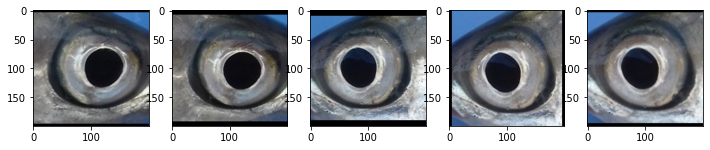

In [ ]:
plt.figure(figsize=(12,8))
for i, x in enumerate(X_bandeng[:5]):
 plt.subplot(1, 5, i+1)
 image = preprocessing.image.array_to_img(x)
 plt.imshow(image)

plt.show()

# Model

In [3]:
class_name = ['SEGAR', 'CUKUP_SEGAR', 'TIDAK_SEGAR']
nilai = [2,1,0]

width = 200
height = 200

In [ ]:
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 25
batch_size = 32
color_channels = 3

def build_model_tf(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,lr=lr):
 model = tf.keras.models.Sequential()
 model.add(tf.keras.layers.Conv2D(conv_1, (3,3), input_shape=(width, height, color_channels), activation='relu'))
 model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
 model.add(tf.keras.layers.Dropout(conv_1_drop))
 
 model.add(tf.keras.layers.Conv2D(conv_2, (3,3), activation='relu'))
 model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
 model.add(tf.keras.layers.Dropout(conv_2_drop))
 model.add(tf.keras.layers.Flatten())

 model.add(tf.keras.layers.Dense(dense_1_n, activation='relu'))
 model.add(tf.keras.layers.Dropout(dense_1_drop))
 model.add(tf.keras.layers.Dense(dense_2_n, activation='relu'))
 model.add(tf.keras.layers.Dropout(dense_2_drop))

 model.add(tf.keras.layers.Dense(len(class_name), activation='softmax'))

 model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
 return model

In [ ]:
model_bandeng = build_model_tf()
model_gurame = build_model_tf()
model_kerapu = build_model_tf()
model_nila = build_model_tf()
print(model_bandeng.summary())
print(model_gurame.summary())
print(model_kerapu.summary())
print(model_nila.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0

# Training

In [ ]:
model_bandeng.fit(X_bandeng, y_bandeng, epochs=25)

Epoch 1/25
7/7 [==============================] - 11s 1s/step - loss: 7.1867 - accuracy: 0.3799
Epoch 2/25
7/7 [==============================] - 10s 1s/step - loss: 1.6689 - accuracy: 0.5515
Epoch 3/25
7/7 [==============================] - 10s 1s/step - loss: 0.8751 - accuracy: 0.6034
Epoch 4/25
7/7 [==============================] - 10s 1s/step - loss: 0.7616 - accuracy: 0.6241
Epoch 5/25
7/7 [==============================] - 10s 1s/step - loss: 0.5884 - accuracy: 0.6880
Epoch 6/25
7/7 [==============================] - 10s 1s/step - loss: 0.3947 - accuracy: 0.8380
Epoch 7/25
7/7 [==============================] - 10s 1s/step - loss: 0.2555 - accuracy: 0.9240
Epoch 8/25
7/7 [==============================] - 10s 1s/step - loss: 0.2102 - accuracy: 0.9315
Epoch 9/25
7/7 [==============================] - 10s 1s/step - loss: 0.2116 - accuracy: 0.9308
Epoch 10/25
7/7 [==============================] - 10s 1s/step - loss: 0.1249 - accuracy: 0.9396
Epoch 11/25
7/7 [======================

In [ ]:
model_gurame.fit(X_gurame, y_gurame, epochs=25)

Epoch 1/25
7/7 [==============================] - 11s 1s/step - loss: 15.0006 - accuracy: 0.3537
Epoch 2/25
7/7 [==============================] - 10s 1s/step - loss: 2.2388 - accuracy: 0.5470
Epoch 3/25
7/7 [==============================] - 10s 1s/step - loss: 0.8491 - accuracy: 0.6086
Epoch 4/25
7/7 [==============================] - 10s 1s/step - loss: 0.8924 - accuracy: 0.6192
Epoch 5/25
7/7 [==============================] - 10s 1s/step - loss: 0.8446 - accuracy: 0.5942
Epoch 6/25
7/7 [==============================] - 10s 1s/step - loss: 0.7324 - accuracy: 0.6961
Epoch 7/25
7/7 [==============================] - 10s 1s/step - loss: 0.5891 - accuracy: 0.7416
Epoch 8/25
7/7 [==============================] - 11s 1s/step - loss: 0.5223 - accuracy: 0.7741
Epoch 9/25
7/7 [==============================] - 10s 1s/step - loss: 0.4126 - accuracy: 0.8268
Epoch 10/25
7/7 [==============================] - 10s 1s/step - loss: 0.3594 - accuracy: 0.8634
Epoch 11/25
7/7 [=====================

In [ ]:
model_kerapu.fit(X_kerapu, y_kerapu, epochs=25)

Epoch 1/25
7/7 [==============================] - 12s 2s/step - loss: 7.2327 - accuracy: 0.4248
Epoch 2/25
7/7 [==============================] - 11s 2s/step - loss: 1.6443 - accuracy: 0.5304
Epoch 3/25
7/7 [==============================] - 10s 1s/step - loss: 0.8839 - accuracy: 0.5852
Epoch 4/25
7/7 [==============================] - 10s 2s/step - loss: 0.9104 - accuracy: 0.6069
Epoch 5/25
7/7 [==============================] - 10s 1s/step - loss: 0.7519 - accuracy: 0.6961
Epoch 6/25
7/7 [==============================] - 10s 1s/step - loss: 0.6597 - accuracy: 0.7372
Epoch 7/25
7/7 [==============================] - 10s 1s/step - loss: 0.6650 - accuracy: 0.7059
Epoch 8/25
7/7 [==============================] - 10s 1s/step - loss: 0.5515 - accuracy: 0.8424
Epoch 9/25
7/7 [==============================] - 10s 1s/step - loss: 0.4365 - accuracy: 0.8268
Epoch 10/25
7/7 [==============================] - 10s 1s/step - loss: 0.3782 - accuracy: 0.8625
Epoch 11/25
7/7 [======================

In [ ]:
model_nila.fit(X_nila, y_nila, epochs=25)

Epoch 1/25
7/7 [==============================] - 12s 2s/step - loss: 7.7266 - accuracy: 0.4186
Epoch 2/25
7/7 [==============================] - 10s 1s/step - loss: 2.1065 - accuracy: 0.3874
Epoch 3/25
7/7 [==============================] - 10s 1s/step - loss: 1.1809 - accuracy: 0.4755
Epoch 4/25
7/7 [==============================] - 10s 1s/step - loss: 0.9852 - accuracy: 0.5121
Epoch 5/25
7/7 [==============================] - 10s 1s/step - loss: 0.9735 - accuracy: 0.4918
Epoch 6/25
7/7 [==============================] - 10s 1s/step - loss: 0.9163 - accuracy: 0.5964
Epoch 7/25
7/7 [==============================] - 10s 1s/step - loss: 0.8241 - accuracy: 0.6489
Epoch 8/25
7/7 [==============================] - 10s 1s/step - loss: 0.6797 - accuracy: 0.7391
Epoch 9/25
7/7 [==============================] - 10s 1s/step - loss: 0.4955 - accuracy: 0.7700
Epoch 10/25
7/7 [==============================] - 10s 1s/step - loss: 0.3777 - accuracy: 0.8755
Epoch 11/25
7/7 [======================

In [ ]:
model_bandeng.save('/content/modelh5/bandeng_eye_model.h5')
model_gurame.save('/content/modelh5/gurame_eye_model.h5')
model_kerapu.save('/content/modelh5/kerapu_eye_model.h5')
model_nila.save('/content/modelh5/nila_eye_model.h5')

In [ ]:
!zip -r /content/eye_model_h5.zip /content/modelh5

  adding: content/modelh5/ (stored 0%)
  adding: content/modelh5/kerapu_eye_model.h5 (deflated 10%)
  adding: content/modelh5/bandeng_eye_model.h5 (deflated 14%)
  adding: content/modelh5/gurame_eye_model.h5 (deflated 11%)
  adding: content/modelh5/nila_eye_model.h5 (deflated 9%)


In [ ]:
from google.colab import files

<module 'google.colab.files' from '/usr/local/lib/python3.7/dist-packages/google/colab/files.py'>

In [ ]:
files.download('eye_model_h5.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('eye_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp eye_model.zip '/content/drive/My Drive'

In [ ]:
!cp eye_model_h5.zip /content/drive/MyDrive

# Testing

In [4]:
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img


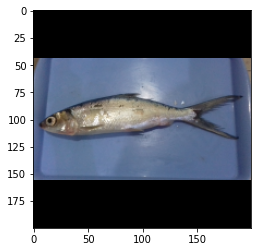

BANDENG


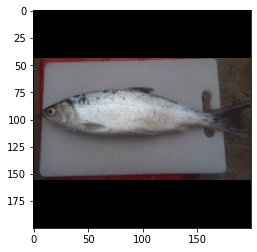

BANDENG


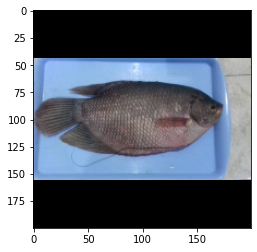

GURAME


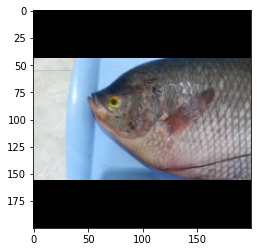

GURAME


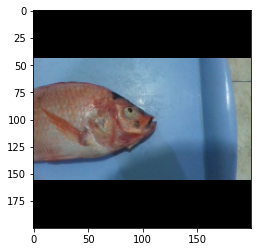

NILA


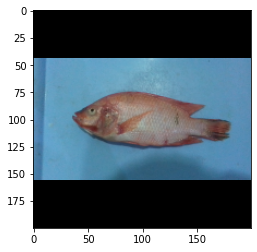

NILA


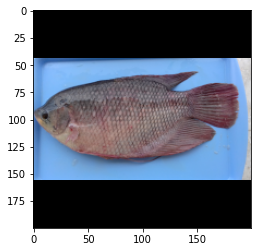

GURAME


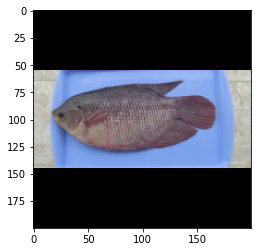

GURAME


In [ ]:
for i in range(8):
  file_name = '/tmp/'+str(i)+'.jpg'
  image = cv2.imread(file_name)
  image = resizeAndPad(image, (width, height))
  image = image[...,::-1]
  plt.imshow(image)
  plt.show()
  type_predict = np.expand_dims(image, axis=0)
  pred = model2.predict(type_predict)
  print(class_name[np.argmax(pred)])

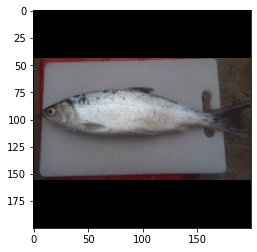

[[1. 0. 0. 0.]]
BANDENG


In [ ]:
file_name = '/tmp/1.jpg'
image = cv2.imread(file_name)
image = resizeAndPad(image, (width, height))
image = image[...,::-1]
plt.imshow(image)
plt.show()
type_predict = np.expand_dims(image, axis=0)
pred = model2.predict(type_predict)
print(pred)
print(class_name[np.argmax(pred)])

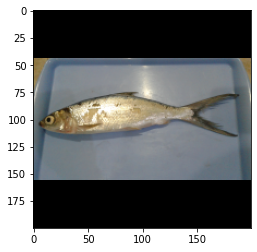

[[1. 0. 0. 0.]]
BANDENG


In [ ]:
file_name = '/tmp/20210126_193317.jpg'
image = cv2.imread(file_name)
image = resizeAndPad(image, (width, height))
image = image[...,::-1]
plt.imshow(image)
plt.show()
type_predict = np.expand_dims(image, axis=0)
pred = model2.predict(type_predict)
print(pred)
print(class_name[np.argmax(pred)])

In [ ]:
model2.save('/tmp/fish_classification.h5')

In [5]:
!cp '/content/drive/My Drive/eye_model_h5.zip' '/content/eye_model_h5.zip'

In [6]:
!unzip '/content/eye_model_h5.zip'

Archive:  /content/eye_model_h5.zip
   creating: content/modelh5/
  inflating: content/modelh5/kerapu_eye_model.h5  
  inflating: content/modelh5/bandeng_eye_model.h5  
  inflating: content/modelh5/gurame_eye_model.h5  
  inflating: content/modelh5/nila_eye_model.h5  


In [11]:
model_load = tf.keras.models.load_model('/content/content/modelh5/bandeng_eye_model.h5')

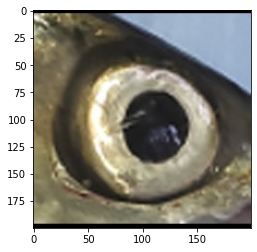

[[0. 0. 1.]]
TIDAK_SEGAR


In [14]:
file_name = 'crop_eye_bandeng4.jpg'
image = cv2.imread(file_name)
# image = resizeAndPad(image, (width, height))
image = image[...,::-1]
plt.imshow(image)
plt.show()
type_predict = np.expand_dims(image, axis=0)
pred = model_load.predict(type_predict)
print(pred)
print(class_name[np.argmax(pred)])

# To TFLite

In [ ]:
from tensorflow.contrib import lite
converter = lite.TFLiteConverter.from_keras_model_file( '/tmp/fish_classification.h5' ) # Your model's name
model = converter.convert()
file = open( '/tmp/fish_classification.tflite' , 'wb' ) 
file.write( model )

ModuleNotFoundError: ignored

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/tmp/fish_classification.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/tmp/fish_classification.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpq4b6ly17/assets


304125220